<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Generalization_in_Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise:** `Generalization in Linear Model`

**Case: 'Admission_Predict' dataset**

- Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
- Target: 'Chance of Admit'

- Split the data with an 80:20 ratio and random_state = 42.

- Use Ridge Regression and Lasso Regression models with various alpha values ​​(100,000, 10,000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).

- What is the best alpha value for each model?

- Compare the performance of the two models in terms of their RMSE values. Which is better?

In [1]:
# Importing required libraries

# data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# imputer
from sklearn.impute import KNNImputer

# column transformer (Integerating data preprocessing steps)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# Loading dataset admission_predict.csv
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/Admission_Predict.csv'
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Rows and columns
data.shape

(400, 9)

In [9]:
# Data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


### **Data Understanding**

- The dataset depicts 400 individuals.
- Each row represents information/characteristics of an individual, such as GRE score, TOEFL score, CGPA, and others, along with information on their acceptance probability.

**Initial assesment**

In [10]:
# Check data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Serial No.,int64,0.0,False,400,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,GRE Score,int64,0.0,False,49,"[337, 324, 316, 322, 314, 330, 321, 308, 302, ..."
2,TOEFL Score,int64,0.0,False,29,"[118, 107, 104, 110, 103, 115, 109, 101, 102, ..."
3,University Rating,int64,0.0,False,5,"[4, 3, 2, 5, 1]"
4,SOP,float64,0.0,False,9,"[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]"
5,LOR,float64,0.0,False,9,"[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]"
6,CGPA,float64,0.0,False,168,"[9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, ..."
7,Research,int64,0.0,False,2,"[1, 0]"
8,Chance of Admit,float64,0.0,False,60,"[0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68,..."


**Descriptive Statistics**

In [11]:
display(data.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Insight**

- The dataset consists of 569 rows and 3 columns.
- Numeric variables: texture_mean, concave points_mean
- Categorical variable: diagnosis
- Texture_mean ranges from 9.71 to 39.28
- Concave points_mean ranges from 0 to 0.2012

### **Exploratory Data Analysis (EDA)**

#### `Numerical Features`

### **Data Preprocessing**

#### `Drop Unused Columns`

In [12]:
data.drop(columns=['Serial No.', 'Research'], inplace=True)

#### `Duplicates`

In [13]:
print(f"Number of duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of {len(data[data.duplicated()])/len(data)*100:.2f}%')

Number of duplicated data: (0, 7)
Percentage of 0.00%


There are no duplicates.

#### `Missing Values`

In [14]:
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Chance of Admit,0


There are no missing values

#### `Outliers`

In [15]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,GRE Score,0,0.00,282.50000,350.50000
1,TOEFL Score,0,0.00,89.50000,125.50000
2,University Rating,0,0.00,-1.00000,7.00000
3,SOP,0,0.00,0.25000,6.25000
4,LOR,1,0.25,1.50000,5.50000
5,CGPA,1,0.25,6.83125,10.40125
6,Chance of Admit,2,0.50,0.35500,1.11500


There are outliers in the numerical column with a percentage of approximately 0.25% - 0.50%. We will retain these outliers as they are insignificant.

#### `Collinearity`

In [16]:
numerical = data.drop(columns='Chance of Admit ').columns

In [17]:
numerical

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'], dtype='object')

In [18]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

We will carry out repeated testing until we obtain a VIF value < 10.

In [19]:
vif_df = calculate_vif(data[numerical])
vif_df

,Feature,VIF
0,GRE Score,1437.238937
1,TOEFL Score,1347.408999
5,CGPA,1075.197733
4,LOR,38.372679
3,SOP,37.536048
2,University Rating,21.561438


There is multicollinearity, but we will still maintain the columns and check the effect of regularization on these features.

#### `Feature Engineering`

**Scaling**

We will use `MinMaxScaler`. Ridge and Lasso require scaling.

### **Modeling**

**Define Features (X) and Target (y)**

In [20]:
# feature
X = data.drop(columns='Chance of Admit ')

# target
y = data['Chance of Admit ']

**Data Splitting**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### `Model Experiment`

Setting basic parameters to initialize the experiment and create a transformation pipeline

In [22]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Create a Column Transformer
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'])
], remainder='passthrough')

# fit and transform your data using the preprocessor
X_train_scale = transformer.fit_transform(X_train)
X_test_scale = transformer.transform(X_test)

**Benchmark Model**

In [23]:
# Set alpha
alphas = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]

`Ridge Regression`

In [24]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error

In [25]:
# Create lists to store the rmse score
ridge_rmse_score_test = []
ridge_rmse_score_train = []

# Fit models with different alphas and record the coefficients
for alpha in alphas:
    # Define and train the model
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(X_train_scale, y_train)

    # Make prediction
    y_predict_train = ridge_regression.predict(X_train_scale)
    y_predict_test = ridge_regression.predict(X_test_scale)

    # Calculate rmse for each model
    ridge_rmse_score_train.append(root_mean_squared_error(y_train, y_predict_train))
    ridge_rmse_score_test.append(root_mean_squared_error(y_test, y_predict_test))

pd.DataFrame({
    'alpha': alphas,
    'train': ridge_rmse_score_train,
    'test': ridge_rmse_score_test,
})

,alpha,train,test
0,100000.000,0.137391,0.160681
1,10000.000,0.136683,0.159939
2,1000.000,0.130179,0.153108
3,100.000,0.096458,0.116685
4,10.000,0.067969,0.080017
5,1.000,0.063293,0.070886
6,0.100,0.062851,0.069279
7,0.010,0.062843,0.069117
8,0.001,0.062842,0.069101


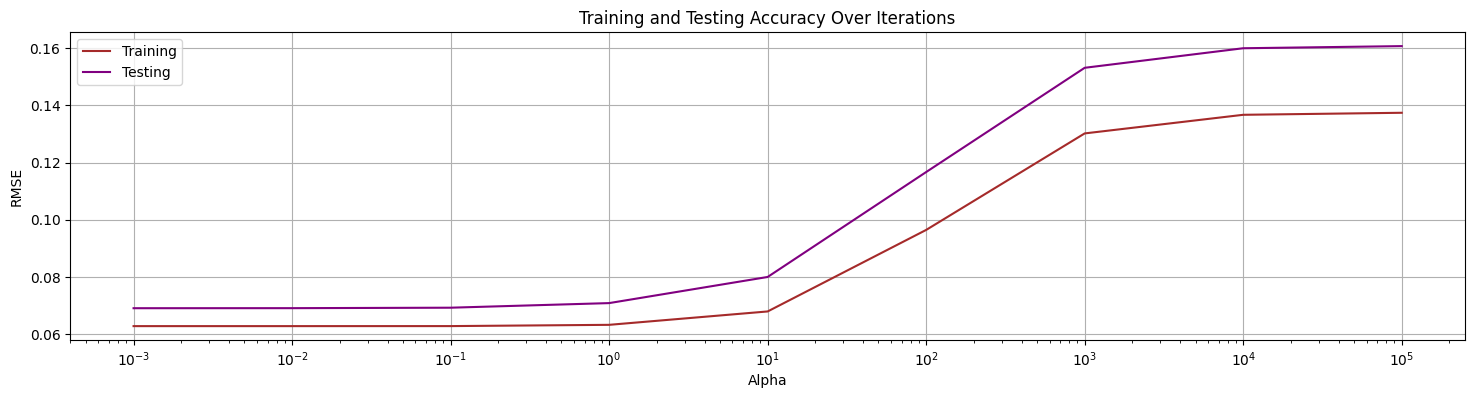

In [26]:
# Plot the training and testing accuracies
plt.figure(figsize=(18,4))
plt.plot(alphas, ridge_rmse_score_train, label='Training', c='brown')
plt.plot(alphas, ridge_rmse_score_test, label='Testing', c='purple')

# Set label
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Training and Testing Accuracy Over Iterations')

# Set scale of axis
plt.xscale('log')
plt.axis('tight')

# Show the plot
plt.grid()
plt.legend()
plt.show()

**Insight**

- The higher the alpha value, the greater the penalty imposed on each variable.
- In Ridge, the higher the alpha, the smaller the regression coefficient, but it doesn't reach 0.
- If the alpha value is too high, the model tends to underfit, where the MSE values ​​on the train and test sets are still large (alpha 100,000 to 10).
- The best alpha value = 1 with an RMSE of 0.070886

**alpha = 1**

In [27]:
# define model
ridge_regression = Ridge(alpha=1)

# fitting model
ridge_regression.fit(X_train_scale, y_train)

# predict
y_predict_test = ridge_regression.predict(X_test_scale)
y_predict_test

# RMSE
RMSE = root_mean_squared_error(y_test, y_predict_test)
RMSE

0.0708862204746461

In [28]:
# coeficient regression for alpha=1
ridge_regression.coef_

array([0.13496   , 0.0947126 , 0.04405082, 0.0145648 , 0.07122857,
       0.2668711 ])

In [29]:
df_coef_ridge = pd.DataFrame({
    'feature' : X.columns,
    'coef' : ridge_regression.coef_
})

df_coef_ridge.sort_values('coef', ascending=False)

,feature,coef
5,CGPA,0.266871
0,GRE Score,0.134960
1,TOEFL Score,0.094713
4,LOR,0.071229
2,University Rating,0.044051
3,SOP,0.014565


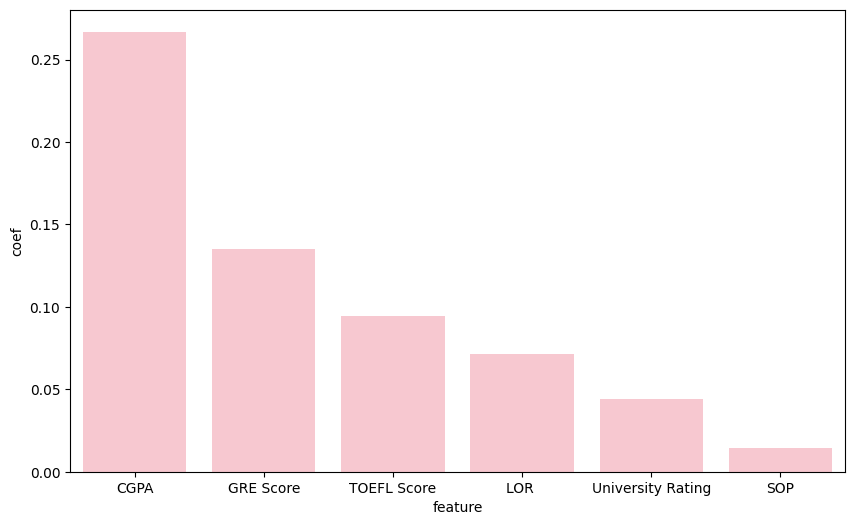

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_coef_ridge.sort_values('coef', ascending=False), x='feature', y='coef', color='pink')
plt.show()

**Model Interpretation**

Most important features:
- CGPA = 0.266871. The higher the GPA, the greater the chance of acceptance.
- GRE Score = 0.134960. The higher the GRE score, the greater the chance of acceptance.

Least important features:
- SOP = 0.014565. The higher the essay score, the greater the chance of acceptance. However, the effect is very weak.

`Lasso Regression`

In [31]:
# Create lists to store the rmse score
lasso_rmse_score_test = []
lasso_rmse_score_train = []

# Fit models with different alphas and record the coefficients
for alpha in alphas:
    # Define and train the model
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(X_train_scale, y_train)

    # Make prediction
    y_predict_train = lasso_regression.predict(X_train_scale)
    y_predict_test = lasso_regression.predict(X_test_scale)

    # Calculate rmse for each model
    lasso_rmse_score_train.append(root_mean_squared_error(y_train, y_predict_train))
    lasso_rmse_score_test.append(root_mean_squared_error(y_test, y_predict_test))

pd.DataFrame({
    'alpha': alphas,
    'train': lasso_rmse_score_train,
    'test': lasso_rmse_score_test,
})

,alpha,train,test
0,100000.000,0.137470,0.160764
1,10000.000,0.137470,0.160764
2,1000.000,0.137470,0.160764
3,100.000,0.137470,0.160764
4,10.000,0.137470,0.160764
5,1.000,0.137470,0.160764
6,0.100,0.137470,0.160764
7,0.010,0.083653,0.103012
8,0.001,0.063096,0.071085


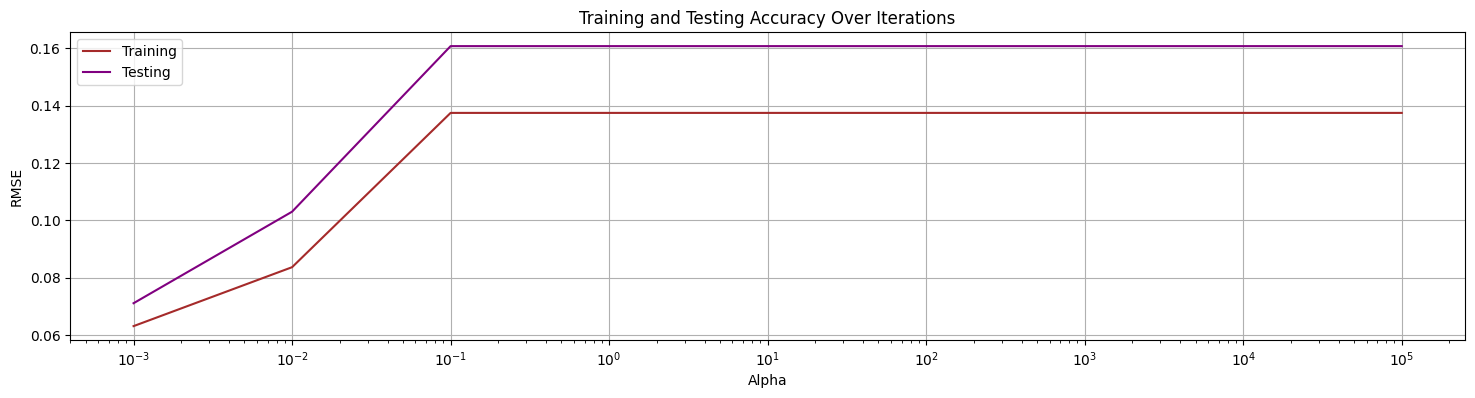

In [32]:
# Plot the training and testing accuracies
plt.figure(figsize=(18,4))
plt.plot(alphas, lasso_rmse_score_train, label='Training', c='brown')
plt.plot(alphas, lasso_rmse_score_test, label='Testing', c='purple')

# Set label
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Training and Testing Accuracy Over Iterations')

# Set scale of axis
plt.xscale('log')
plt.axis('tight')

# Show the plot
plt.grid()
plt.legend()
plt.show()

**Interpretation**

- In Lasso, the higher the alpha value, the smaller the regression coefficient, and it can even reach 0.
- If the alpha value is too high, the model tends to underfit because the MSE values ​​of the train and test sets are still high (alpha 100,000 to 0.01).
- The best alpha value is 0.001, and the difference in RMSE values ​​between the two sets is not too significant.

- The best alpha value is 0.001 with an RMSE of 0.071085

**alpha = 0.001**

In [33]:
# define model
lasso_regression = Lasso(alpha=0.001)

# fitting model
lasso_regression.fit(X_train_scale, y_train)

# predict
y_predict_test = lasso_regression.predict(X_test_scale)
y_predict_test

# RMSE
RMSE = root_mean_squared_error(y_test, y_predict_test)
RMSE

0.07108522588271904

In [34]:
# coeficient regression for alpha=0.001
lasso_regression.coef_

array([0.12056895, 0.06994597, 0.0390905 , 0.00224655, 0.05548071,
       0.32970881])

In [35]:
df_coef_lasso = pd.DataFrame({
    'feature' : X.columns,
    'coef' : lasso_regression.coef_
})

df_coef_lasso.sort_values('coef', ascending=False)

,feature,coef
5,CGPA,0.329709
0,GRE Score,0.120569
1,TOEFL Score,0.069946
4,LOR,0.055481
2,University Rating,0.039090
3,SOP,0.002247


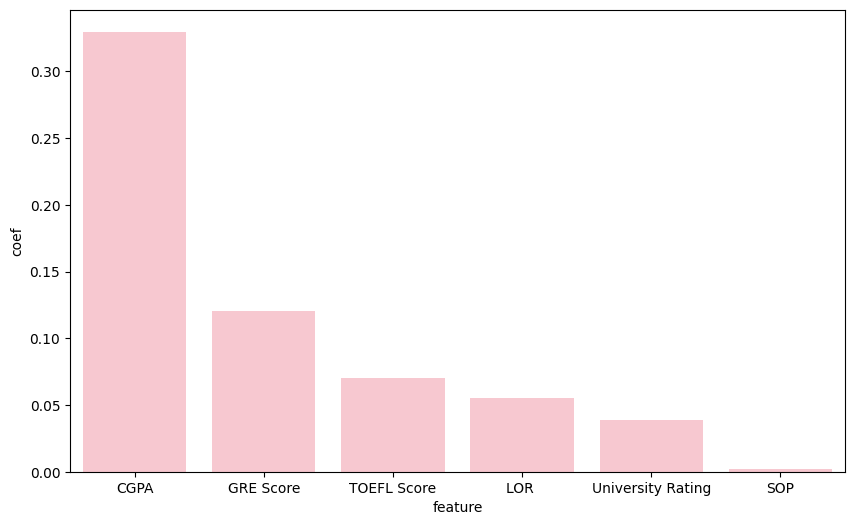

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_coef_lasso.sort_values('coef', ascending=False), x='feature', y='coef', color='pink')
plt.show()

**Model Interpretation**

Most important features:
- CGPA = 0.329709. The higher the GPA, the greater the chance of acceptance.
- GRE Score = 0.120569. The higher the GRE score, the greater the chance of acceptance.

Least important features:
- SOP = 0.002247. The higher the essay score, the greater the chance of acceptance. However, the effect is very weak.

`Linear Regression`

In [37]:
# define model
linear_regression = LinearRegression()

# fitting model
linear_regression.fit(X_train_scale, y_train)

# predict
y_predict_test = linear_regression.predict(X_test_scale)
y_predict_test

# RMSE
RMSE = root_mean_squared_error(y_test, y_predict_test)
RMSE

0.06909956036623244

#### **Conclusion**

1. Ridge regression
- Best alpha = 1
- RMSE test = 0.070886

2. Lasso regression
- Best alpha = 0.001
- RMSE test = 0.071085

3. Linear Regression
- RMSE test: 0.069100

Overall, the performance of this admission data model is good even though it only uses Linear Regression (without any penalty).